In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [12]:
df = pd.read_csv("../data/voice.csv")

df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [14]:
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

X = df.drop(['label', 'label_encoded'], axis=1)
y = df['label_encoded']
feature_names = X.columns

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
# Urutkan fitur dari yang paling penting
indices = np.argsort(importances)[::-1]
sorted_features = [feature_names[i] for i in indices]

print("Peringkat Fitur berdasarkan 'Importance':")
for f in range(X.shape[1]):
    print(f"{f + 1}. Fitur '{feature_names[indices[f]]}' ({importances[indices[f]]:.4f})")

# Uji akurasi kNN (k=5) dengan menambahkan fitur satu per satu
accuracies_fs = []
k_default = 5 #
print(f"\nMenguji akurasi kNN (k={k_default}) dengan jumlah fitur berbeda...")

for i in range(1, len(sorted_features) + 1):
    # Pilih top i features
    selected_indices = indices[:i]
    
    X_train_fs = X_train[:, selected_indices]
    X_test_fs = X_test[:, selected_indices]
    
    # Buat dan latih model kNN
    knn = KNeighborsClassifier(n_neighbors=k_default)
    knn.fit(X_train_fs, y_train)
    
    y_pred = knn.predict(X_test_fs)
    acc = accuracy_score(y_test, y_pred)
    accuracies_fs.append(acc)

Peringkat Fitur berdasarkan 'Importance':
1. Fitur 'meanfun' (0.3172)
2. Fitur 'IQR' (0.2296)
3. Fitur 'Q25' (0.1550)
4. Fitur 'sd' (0.0739)
5. Fitur 'sp.ent' (0.0405)
6. Fitur 'sfm' (0.0257)
7. Fitur 'centroid' (0.0207)
8. Fitur 'meanfreq' (0.0195)
9. Fitur 'mode' (0.0181)
10. Fitur 'median' (0.0136)
11. Fitur 'Q75' (0.0112)
12. Fitur 'skew' (0.0109)
13. Fitur 'maxdom' (0.0102)
14. Fitur 'minfun' (0.0097)
15. Fitur 'mindom' (0.0096)
16. Fitur 'dfrange' (0.0094)
17. Fitur 'kurt' (0.0074)
18. Fitur 'meandom' (0.0074)
19. Fitur 'modindx' (0.0060)
20. Fitur 'maxfun' (0.0045)

Menguji akurasi kNN (k=5) dengan jumlah fitur berbeda...


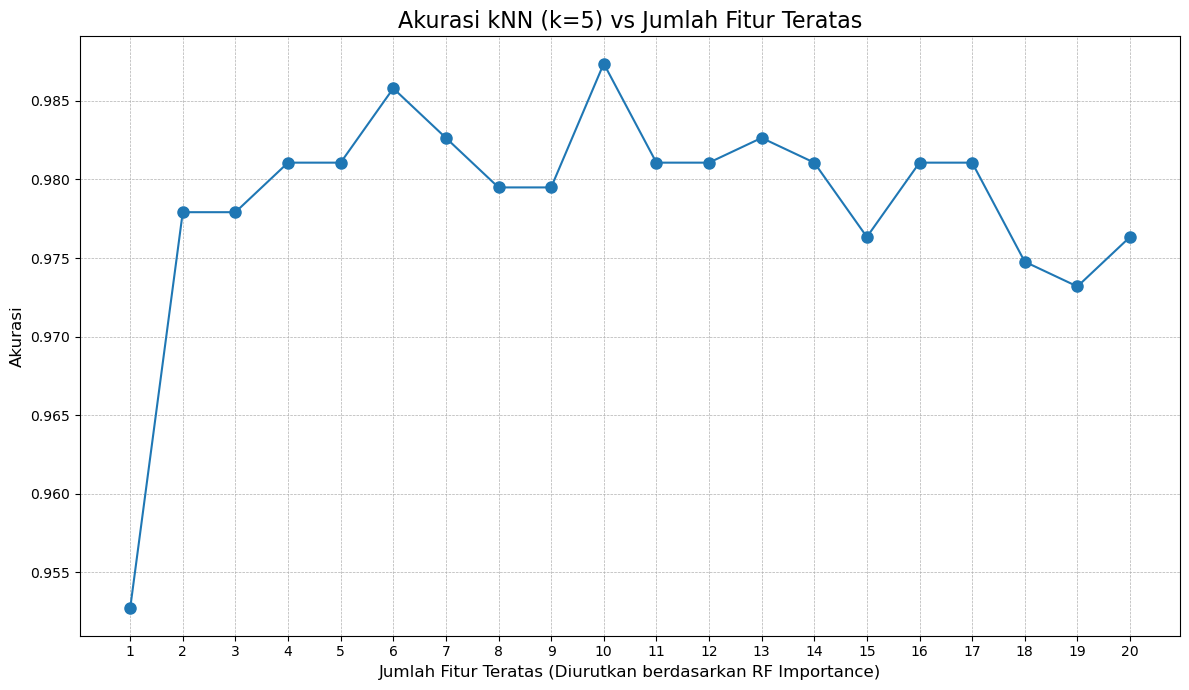

In [17]:
plt.figure(figsize=(12, 7))
plt.plot(range(1, len(sorted_features) + 1), accuracies_fs, marker='o', linestyle='-', markersize=8)
plt.title(f'Akurasi kNN (k={k_default}) vs Jumlah Fitur Teratas', fontsize=16)
plt.xlabel('Jumlah Fitur Teratas (Diurutkan berdasarkan RF Importance)', fontsize=12)
plt.ylabel('Akurasi', fontsize=12)
plt.xticks(range(1, len(sorted_features) + 1))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

In [18]:
best_num_features = np.argmax(accuracies_fs) + 1
best_accuracy_fs = np.max(accuracies_fs)
optimal_feature_indices = indices[:best_num_features]
optimal_features = [feature_names[i] for i in optimal_feature_indices]

print(f"\nHasil Pemilihan Fitur:")
print(f"Akurasi terbaik ({best_accuracy_fs:.4f}) dicapai dengan {best_num_features} fitur teratas.")
print(f"Fitur optimal yang digunakan: {optimal_features}")


Hasil Pemilihan Fitur:
Akurasi terbaik (0.9874) dicapai dengan 10 fitur teratas.
Fitur optimal yang digunakan: ['meanfun', 'IQR', 'Q25', 'sd', 'sp.ent', 'sfm', 'centroid', 'meanfreq', 'mode', 'median']


In [19]:
X_train_optimal = X_train[:, optimal_feature_indices]
X_test_optimal = X_test[:, optimal_feature_indices]

In [21]:
k_range = range(1, 41) # Coba k dari 1 sampai 40
accuracies_k = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_optimal, y_train)
    y_pred = knn.predict(X_test_optimal)
    accuracies_k.append(accuracy_score(y_test, y_pred))

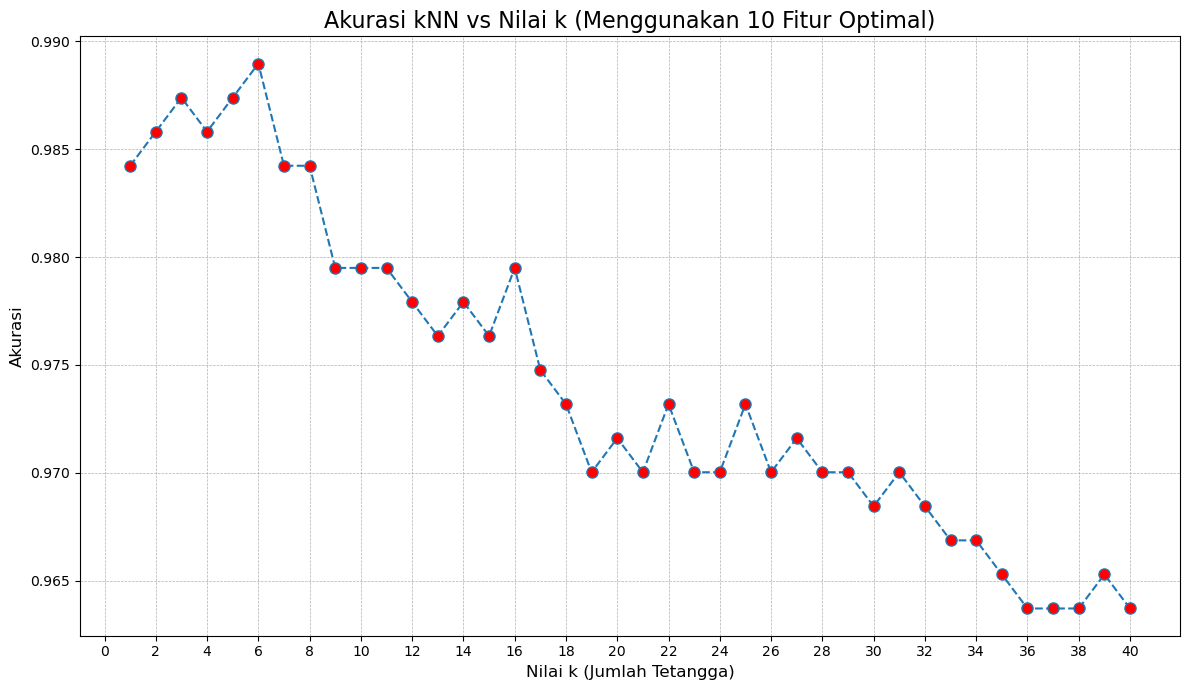

In [22]:
plt.figure(figsize=(12, 7))
plt.plot(k_range, accuracies_k, marker='o', linestyle='dashed', markersize=8, markerfacecolor='red')
plt.title(f'Akurasi kNN vs Nilai k (Menggunakan {best_num_features} Fitur Optimal)', fontsize=16)
plt.xlabel('Nilai k (Jumlah Tetangga)', fontsize=12)
plt.ylabel('Akurasi', fontsize=12)
plt.xticks(np.arange(0, 41, 2)) # Tampilkan ticks setiap 2
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

In [23]:
best_k_index = np.argmax(accuracies_k)
best_k = k_range[best_k_index]
best_accuracy_k = accuracies_k[best_k_index]

print(f"\nHasil Analisis k:")
print(f"Akurasi terbaik ({best_accuracy_k:.4f}) dicapai dengan k = {best_k}.")


Hasil Analisis k:
Akurasi terbaik (0.9890) dicapai dengan k = 6.
